In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
college_df = pd.read_csv(r'/content/drive/My Drive/DATA 606/Final.csv')

In [ ]:
college_df.head()

,Unnamed: 0,Unnamed: 0.1,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,cost_living_index_2020,relative_value_dollar_2017,national_rank
0,0,62,100663.0,1052,University of Alabama at Birmingham,Public,1,901,Communication and Media Studies,3,Bachelor's Degree,86,21474,223,21667,92,84,26300,80.0,85.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
1,1,64,100663.0,1052,University of Alabama at Birmingham,Public,1,1101,"Computer and Information Sciences, General",3,Bachelor's Degree,36,27750,288,25889,34,34,56900,30.0,35.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
2,2,69,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,5,Master's Degree,41,22601,263,25440,48,48,50500,58.0,11.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
3,3,72,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,8,Graduate/Professional Certificate,22,57346,668,56814,22,22,57200,28.0,7.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
4,4,73,100663.0,1052,University of Alabama at Birmingham,Public,1,1310,Special Education and Teaching,5,Master's Degree,36,28218,329,28717,27,27,43700,29.0,28.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0


In [ ]:
college_df=college_df.drop(columns=['Unnamed: 0',	'Unnamed: 0.1'])

I will be creating a new attribute named 'Financial Factor'. This factor is a difference in the amount of money a student earns after graduation annually minus the amount of money a student spends for tuition and living in a year. <br>
As the factor increases, the amount of money a student is saving increases. A negative value implies the student is at loss, meaning the student ended up spending more on education and is earning less after graduation.



In [ ]:
college_df['financial_factor']=college_df['MD_EARN_WNE']-college_df['TUITFTE']-college_df['INEXPFTE']

Plotting the financial factor against the cost of living index to see how the universities are distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


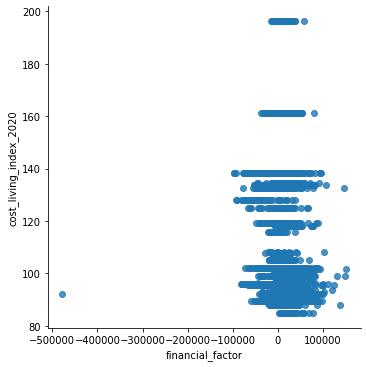

In [ ]:
sns.lmplot('financial_factor','cost_living_index_2020',
           data=college_df,
           fit_reg=False,
           )

In [ ]:
college_df['financial_factor'].min()

-477826.0

In [ ]:
college_df[college_df['financial_factor']==-477826.0]

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,cost_living_index_2020,relative_value_dollar_2017,national_rank,financial_factor
3347,228635.0,10019,University of Texas Southwestern Medical Center,Public,1,5112,Medicine,7,First Professional Degree,284,128845,1501,119168,318,317,55600,221.0,213.0,Dallas,TX,75390-9096,12874.0,520552.0,Southern Association of Colleges and Schools C...,NaN,92.3,103.09,36.0,-477826.0


Since there is only one outlier, I will be dropping the row.

In [ ]:
college_df.drop(college_df[college_df['financial_factor']==-477826.0].index, inplace=True)

Scaling the columns: While training the machine learning model, if the numerical columns are not scaled, the algorithm tends to give higher values more weight than the small values irrespective of the units. To avoid this problem, I have scaled the financial factor and cost of living columns.


In [ ]:
min_max_scaler = MinMaxScaler()
college_df[['cost_living_index_2020_scaled']] = min_max_scaler.fit_transform(college_df[['cost_living_index_2020']])
college_df[['financial_factor_scaled']] = min_max_scaler.fit_transform(college_df[['financial_factor']])

In [ ]:
college_df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,cost_living_index_2020,relative_value_dollar_2017,national_rank,financial_factor,cost_living_index_2020_scaled,financial_factor_scaled
0,100663.0,1052,University of Alabama at Birmingham,Public,1,901,Communication and Media Studies,3,Bachelor's Degree,86,21474,223,21667,92,84,26300,80.0,85.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,-3331.0,0.041256,0.377895
1,100663.0,1052,University of Alabama at Birmingham,Public,1,1101,"Computer and Information Sciences, General",3,Bachelor's Degree,36,27750,288,25889,34,34,56900,30.0,35.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,27269.0,0.041256,0.500716
2,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,5,Master's Degree,41,22601,263,25440,48,48,50500,58.0,11.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,20869.0,0.041256,0.475028
3,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,8,Graduate/Professional Certificate,22,57346,668,56814,22,22,57200,28.0,7.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,27569.0,0.041256,0.501921
4,100663.0,1052,University of Alabama at Birmingham,Public,1,1310,Special Education and Teaching,5,Master's Degree,36,28218,329,28717,27,27,43700,29.0,28.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,14069.0,0.041256,0.447735


The goal of the project is to suggest universities based on the financial budget and the field of interest of the student. I want to divide the university suggestions into three categories: <br>
1. The best universities: universities having a high financial factor and less cost of living <br>
2. The safe options: Universities having a less financial factor and mediocre cost of living <br>
3. The risky universities: These are the universities where the financial factor is very less and the cost of living is high
<br> <br>
To achieve this, I will be clustering the data points to see if the universities can be divided in an above-mentioned way. I have decided to use the K *means* clustering algorithm.

In [ ]:
km=KMeans(n_clusters=5,random_state=1)
req_data=college_df[['financial_factor_scaled','cost_living_index_2020_scaled']]
km.fit(req_data)
predict=km.predict(req_data)

In [ ]:
#I will be storing the cluster number as a column in the dataframe for future use

college_df['cluster number']=predict

In [ ]:
college_df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,cost_living_index_2020,relative_value_dollar_2017,national_rank,financial_factor,cost_living_index_2020_scaled,financial_factor_scaled,cluster number
0,100663.0,1052,University of Alabama at Birmingham,Public,1,901,Communication and Media Studies,3,Bachelor's Degree,86,21474,223,21667,92,84,26300,80.0,85.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,-3331.0,0.041256,0.377895,0
1,100663.0,1052,University of Alabama at Birmingham,Public,1,1101,"Computer and Information Sciences, General",3,Bachelor's Degree,36,27750,288,25889,34,34,56900,30.0,35.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,27269.0,0.041256,0.500716,3
2,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,5,Master's Degree,41,22601,263,25440,48,48,50500,58.0,11.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,20869.0,0.041256,0.475028,3
3,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,8,Graduate/Professional Certificate,22,57346,668,56814,22,22,57200,28.0,7.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,27569.0,0.041256,0.501921,3
4,100663.0,1052,University of Alabama at Birmingham,Public,1,1310,Special Education and Teaching,5,Master's Degree,36,28218,329,28717,27,27,43700,29.0,28.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0,14069.0,0.041256,0.447735,0


In [ ]:
college_df.groupby('cluster number', as_index=False)['financial_factor_scaled'].count()

,cluster number,financial_factor_scaled
0,0,1995
1,1,537
2,2,734
3,3,1406
4,4,187


Visuals are always easier to understand! Here is the graph of the clustered universities.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(14.669192708333334, 0.5, 'Cost of living index')

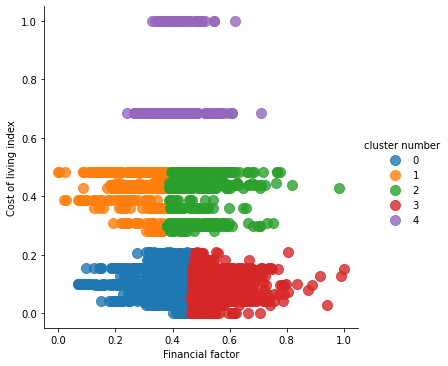

In [ ]:
sns.lmplot('financial_factor_scaled','cost_living_index_2020_scaled',
           data=college_df,
           fit_reg=False,
           hue="cluster number",
           scatter_kws={"marker":"D","s":100})


plt.xlabel('Financial factor')
plt.ylabel('Cost of living index')

Conclusions from clustering:
1. Universities in clusters are 2 and 3 are the best
2. Universities in cluster 0 are the safe options after the best clusters
3. Universities in clusters 1 and 4 are is not suggested and have financial risk involved

Now comes the task of suggesting universities. I will be taking dynamic inputs from the user. The user can choose their interested field of study, the level of the degree, and the amount of tuition fee he/she can afford.

In [ ]:
#Displaying the list of courses

college_df['CIPDESC'].sort_values().unique()

array(['Accounting and Related Services',
       'Advanced/Graduate Dentistry and Oral Sciences',
       'Aerospace, Aeronautical and Astronautical Engineering',
       'Agricultural Business and Management', 'Agricultural Engineering',
       'Agricultural Mechanization', 'Agricultural Production Operations',
       'Agricultural Public Services',
       'Agricultural and Food Products Processing',
       'Agriculture, General', 'Air Transportation',
       'Allied Health Diagnostic, Intervention, and Treatment Professions',
       'Allied Health and Medical Assisting Services',
       'American Sign Language', 'Animal Sciences', 'Anthropology',
       'Apparel and Textiles',
       'Applied Horticulture and Horticultural Business Services',
       'Applied Mathematics', 'Architectural Engineering',
       'Architectural Engineering Technologies/Technicians',
       'Architectural Sciences and Technology', 'Architecture',
       'Area Studies', 'Arts, Entertainment,and Media Managemen

In [ ]:
course=input("Enter your preferred course from the above list: ")

Enter your preferred course from the above list: Computer Science


In [ ]:
college_df['CREDDESC'].unique()

array(["Bachelor's Degree", "Master's Degree",
       'Graduate/Professional Certificate', 'First Professional Degree',
       "Associate's Degree", 'Undergraduate Certificate or Diploma',
       'Doctoral Degree'], dtype=object)

In [ ]:
course_level=input("Enter your course level from the above list: ")

Enter your course level from the above list: Bachelor's Degree


In [ ]:
loan_amount=input("Enter the affordable loan amount/tuition fee per semester: ")

Enter the affordable loan amount/tuition fee per year: 10000


In [ ]:
loan_amount=int(loan_amount)

Defining functions to display the above-discussed categories of universities.

In [ ]:
 def best_universities(course,course_level,loan_amount):
   return college_df[(college_df['CIPDESC']==course) & 
           (college_df['CREDDESC']==course_level) &
           ((college_df['cluster number']==2)| (college_df['cluster number']==3)) &
           ((college_df['TUITFTE']<=loan_amount+5000) & (college_df['TUITFTE']>=loan_amount-5000))]['INSTNM']

In [ ]:
 def second_choice(course,course_level,loan_amount):
   return college_df[(college_df['CIPDESC']==course) & 
           (college_df['CREDDESC']==course_level) &
           (college_df['cluster number']==1) &
           ((college_df['TUITFTE']<=loan_amount+5000) & (college_df['TUITFTE']>=loan_amount-5000))]['INSTNM']

In [ ]:
 def last_options(course,course_level,loan_amount):
   return college_df[(college_df['CIPDESC']==course) & 
           (college_df['CREDDESC']==course_level) &
           ((college_df['cluster number']==0)| (college_df['cluster number']==4)) &
           ((college_df['TUITFTE']<=loan_amount+5000) & (college_df['TUITFTE']>=loan_amount-5000))]['INSTNM']

Below displayed is the list of suggested universities according to the given inputs. The loan amount is ranged from + or - $5000 of the entered amount. 

In [ ]:
#The best universities

best_universities(course,course_level,loan_amount)

110                    University of South Alabama
239                    Northern Arizona University
323                     San Diego State University
365                 San Francisco State University
714                      University of Connecticut
1618                      Georgia State University
1689                         University of Georgia
1815                           University of Idaho
1872             University of Illinois at Chicago
1970                  Northern Illinois University
2228                         University of Memphis
2361                         Iowa State University
2493                      East Carolina University
2598     University of North Carolina at Charlotte
2650    University of North Carolina at Greensboro
2865                     University of New Orleans
3024             Michigan Technological University
3135                   Western Michigan University
3418                       George Mason University
3928                           

In [ ]:
#The safe options

second_choice(course,course_level,loan_amount)

Series([], Name: INSTNM, dtype: object)

In [ ]:
#Financially risky options

last_options(course,course_level,loan_amount)

1763    University of Hawaii at Manoa
Name: INSTNM, dtype: object